In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


In [3]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph
# from rwtools.nemesis.graph.utils import equalize_path_lengths

def to_png(graph, name="temp"):
    out_file = os.path.abspath(f"./{name}.dot")
    nx.drawing.nx_agraph.write_dot(graph, out_file)
    cmd = f"dot -Tpng {out_file} -o {name}.png"
    os.system(cmd)
    img = mpimg.imread(f"{name}.png")
    plt.figure(figsize = (10,10))
    plt.imshow(img)



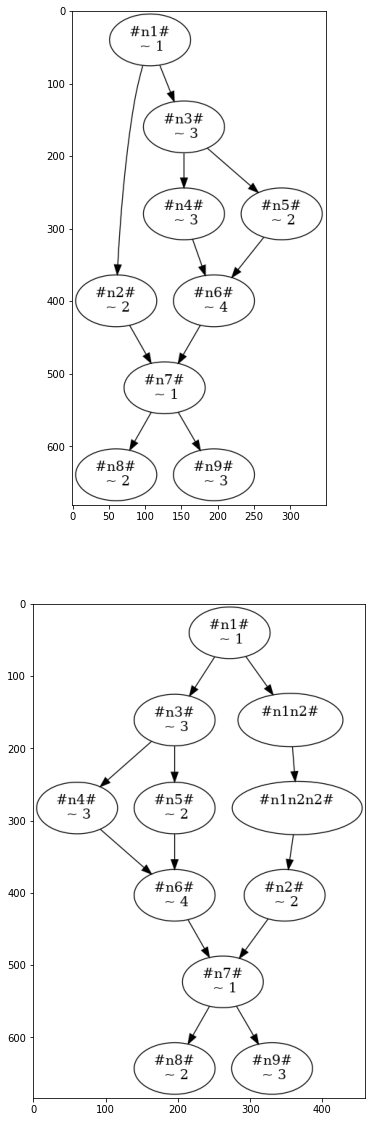

In [8]:
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([2], "n5")
n6 = AbstractNemesisNode([1], "n6")
n6 = AbstractNemesisNode([4], "n6")
n7 = AbstractNemesisNode([1], "n7")
n8 = AbstractNemesisNode([1], "n7")
n8 = AbstractNemesisNode([2], "n8")
n9 = AbstractNemesisNode([3], "n9")



g_nodes = [n1, n2, n3, n4, n5]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)
G.add_node(n5)

G.add_edge(n1, n2)
G.add_edge(n1, n3) 
G.add_edge(n3, n4) 
G.add_edge(n3, n5) 
G.add_edge(n4, n6) 
G.add_edge(n5, n6) 
G.add_edge(n6, n7) 
G.add_edge(n2, n7) 
G.add_edge(n7, n8) 
G.add_edge(n7, n9) 

# G.add_edge(n4, n3)
# G.add_edge(n2, n4)
# G.add_edge(n2, n4)
# G.add_edge(n2, n5)

# G.add_edge(n3, n4)
# G.add_edge(n3, n5)
# G.add_edge(n4, n5)


cfg = ControlFlowGraph(list(G.nodes), G)
figs, axs = plt.subplots(2, figsize=(20, 20))

axs[0].imshow(cfg.to_img())

cfg.insert_nodes()


axs[1].imshow(cfg.to_img())


# Stopping conditions
We can stop balancing when we get to node n7 
- all paths from the root to any leaf go through n7 
- n7 is not a secret dependent branch (if it is obviously it will have to be balanced) 

A node is a stopping nodes when all paths from some target node to some leaf go through it. If this is the case then any latencies following it 
## How to determine such nodes 
Find all paths from the target node to all reachable leaves. If all paths to through a node, then this node is a stopping point 
note: zijn er uitzonderingen op deze regel? 

## When to determine such nodes
Na inserting of nodes? Na unwinding cycles (anders geeft het vinden van alle paden problemen) 
De cycles zouden op zich ook geen effect moeten hebben op dit proces


In [50]:
from networkx.algorithms.simple_paths import all_simple_paths 
def find_leafnodes(graph):
    leafnode = []

    for i in graph.nodes:
        head =  []
        if nx.descendants(graph, i) == set(): #find all leaf nodes
            for a in nx.ancestors(graph, i):  #get all ancestors for leaf node
                if nx.ancestors(graph, a) == set():  #Determine if ancestor is a head node
                    head.append(a)
        if len(head) == 1: #if this leaf had only one head then append to leafnode
            leafnode.append(i)
    return leafnode  

def find_stopping_nodes(graph, target_node):
    # first find all leaves
    leaves = find_leafnodes(G)

    paths = []
    # loop over all paths to all leaves, remove all nodes from the candidate that isn't present in the path
    for l in leaves:
        paths += [set(p) for p in all_simple_paths(G, target_node, l)]
    out = set.intersection(*paths)
    out.remove(target_node)
    return out
    
result = find_stopping_nodes(G, n1)


[n.id for n in result]

['n7']